<b>
<p>
<center>
<font size="5">
Machine Learning, Kaggle Competition Ghouls, Goblins and Ghosts:
</font>
</center>
</p>


# Overview

- Here we will work on kaggle competation kaggle competation [Ghouls, Goblins, and Ghosts... Boo!](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/overview).

- Reference for functions:
https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/pmlm_utilities_shallow.ipynb

- Pipeline
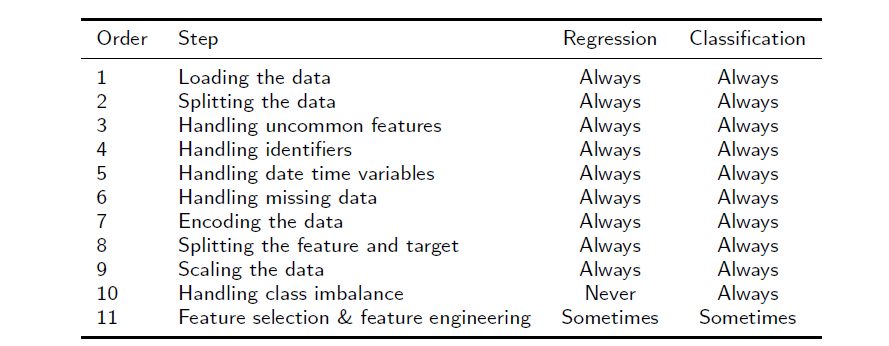




# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning


In [ ]:
# Implement me
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + '/dataset/Ghouls-Goblins/train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + '/dataset/Ghouls-Goblins/test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

No handles with labels found to put in legend.


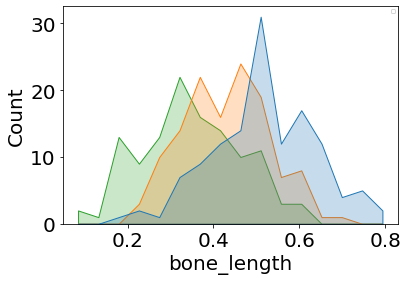

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = df_train, x = 'bone_length', hue = 'type', element = 'poly')
plt.legend(fontsize ='5')
plt.show()

No handles with labels found to put in legend.


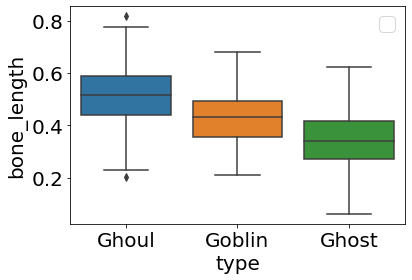

In [ ]:
sns.boxplot(data = df_train, x = 'type',y = 'bone_length')
plt.legend()
plt.show()

No handles with labels found to put in legend.


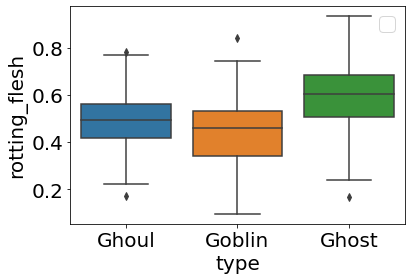

In [ ]:
sns.boxplot(data = df_train, x = 'type',y = 'rotting_flesh')
plt.legend()
plt.show()

No handles with labels found to put in legend.


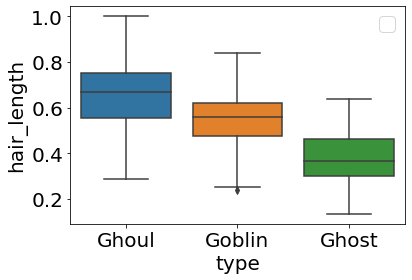

In [ ]:
sns.boxplot(data = df_train, x = 'type',y = 'hair_length')
plt.legend()
plt.show()

No handles with labels found to put in legend.


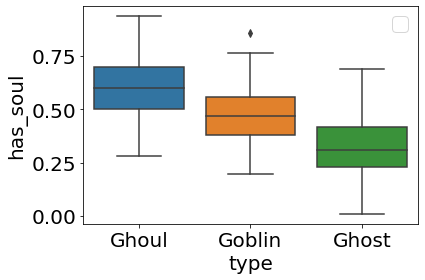

In [ ]:
sns.boxplot(data = df_train, x = 'type',y = 'has_soul')
plt.legend()
plt.show()

In [ ]:
df_train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


No handles with labels found to put in legend.


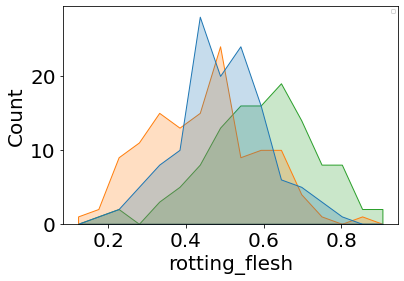

In [ ]:
sns.histplot(data = df_train, x = 'rotting_flesh', hue = 'type', element = 'poly')
plt.legend(fontsize ='5')
plt.show()

No handles with labels found to put in legend.


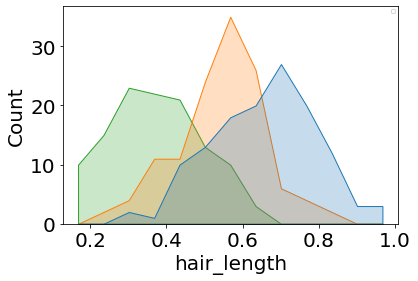

In [ ]:
sns.histplot(data = df_train, x = 'hair_length', hue = 'type', element = 'poly')
plt.legend(fontsize ='5')
plt.show()

No handles with labels found to put in legend.


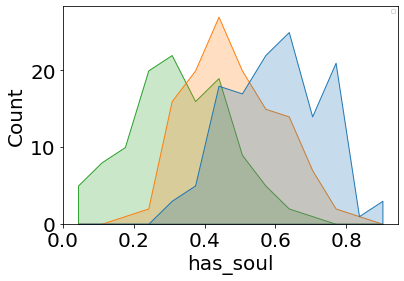

In [ ]:
sns.histplot(data = df_train, x = 'has_soul', hue = 'type', element = 'poly')
plt.legend(fontsize ='5')
plt.show()

In [ ]:
df_train[df_train['hair_length'] < 0.02]

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type


In [ ]:
target = 'type'

df_raw_train.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,371,7


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,6


In [ ]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [ ]:
df_test.drop('color', axis = 1, inplace= True )
df_train.drop('color',axis= 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%) 
# stratify target
df_train, df_val = train_test_split(df_train, train_size=0.50, random_state=random_seed, stratify = df_train['type'])

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
df_train

,id,bone_length,rotting_flesh,hair_length,has_soul,type
0,261,0.496734,0.532486,0.709708,0.649007,Ghoul
1,604,0.200753,0.277945,0.568534,0.556149,Ghoul
2,679,0.416577,0.458523,0.768333,0.654006,Goblin
3,589,0.482716,0.561481,0.531423,0.560659,Ghoul
4,458,0.498438,0.653783,0.378707,0.708981,Goblin
...,...,...,...,...,...,...
180,94,0.268141,0.665224,0.234944,0.321623,Ghost
181,585,0.304519,0.301329,0.545880,0.313645,Goblin
182,399,0.817001,0.400808,0.437047,0.648230,Ghoul
183,674,0.613365,0.489438,0.580808,0.599846,Ghoul


In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,185,6


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,186,6


In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,bone_length
1,hair_length
2,has_soul
3,id
4,rotting_flesh
5,type


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,type
0,261,0.496734,0.532486,0.709708,0.649007,Ghoul
1,604,0.200753,0.277945,0.568534,0.556149,Ghoul
2,679,0.416577,0.458523,0.768333,0.654006,Goblin
3,589,0.482716,0.561481,0.531423,0.560659,Ghoul
4,458,0.498438,0.653783,0.378707,0.708981,Goblin


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,type
0,858,0.440432,0.309498,0.203057,0.194105,Ghost
1,845,0.496140,0.377488,0.647238,0.465689,Ghoul
2,111,0.627652,0.840049,0.414816,0.488617,Goblin
3,321,0.584177,0.445350,0.714323,0.650264,Ghoul
4,162,0.390769,0.801721,0.205236,0.127877,Ghost


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul
0,3,0.471774,0.387937,0.706087,0.698537
1,6,0.427332,0.645024,0.565558,0.451462
2,9,0.549602,0.491931,0.660387,0.449809
3,10,0.638095,0.682867,0.471409,0.356924
4,13,0.361762,0.583997,0.377256,0.276364


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
df[target].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,261
1,604
2,679
3,589
4,458


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.496734,0.532486,0.709708,0.649007,Ghoul
1,0.200753,0.277945,0.568534,0.556149,Ghoul
2,0.416577,0.458523,0.768333,0.654006,Goblin
3,0.482716,0.561481,0.531423,0.560659,Ghoul
4,0.498438,0.653783,0.378707,0.708981,Goblin


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.440432,0.309498,0.203057,0.194105,Ghost
1,0.496140,0.377488,0.647238,0.465689,Ghoul
2,0.627652,0.840049,0.414816,0.488617,Goblin
3,0.584177,0.445350,0.714323,0.650264,Ghoul
4,0.390769,0.801721,0.205236,0.127877,Ghost


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,0.471774,0.387937,0.706087,0.698537
1,0.427332,0.645024,0.565558,0.451462
2,0.549602,0.491931,0.660387,0.449809
3,0.638095,0.682867,0.471409,0.356924
4,0.361762,0.583997,0.377256,0.276364


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
df.isna().sum()

bone_length        0
rotting_flesh      0
hair_length        0
has_soul           0
type             529
dtype: int64

In [ ]:
df_test.isna().sum()

bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
dtype: int64

In [ ]:
len(df_test)

529

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,type,0.587778,object


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,185,5


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,186,5


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,5


In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object


In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,type,4


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.496734,0.532486,0.709708,0.649007,Ghoul
1,0.200753,0.277945,0.568534,0.556149,Ghoul
2,0.416577,0.458523,0.768333,0.654006,Goblin
3,0.482716,0.561481,0.531423,0.560659,Ghoul
4,0.498438,0.653783,0.378707,0.708981,Goblin


In [ ]:
df['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.496734,0.532486,0.709708,0.649007,1
1,0.200753,0.277945,0.568534,0.556149,1
2,0.416577,0.458523,0.768333,0.654006,2
3,0.482716,0.561481,0.531423,0.560659,1
4,0.498438,0.653783,0.378707,0.708981,2


In [ ]:
df['type'].value_counts()

3    529
1    129
2    125
0    117
Name: type, dtype: int64

In [ ]:
df.describe()

,bone_length,rotting_flesh,hair_length,has_soul,type
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.429054,0.504961,0.522163,0.467104,2.184444
std,0.134744,0.153567,0.170981,0.178150,1.103832
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332085,0.402419,0.396112,0.343909,1.000000
50%,0.426781,0.505279,0.530294,0.465508,3.000000
75%,0.518167,0.605218,0.644958,0.589235,3.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
df_train['type'].value_counts()

1    64
2    62
0    59
Name: type, dtype: int64

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,185,5


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,186,5


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,5


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
y_val

array([0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 1,
       2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 2, 1, 0, 1, 2, 2])

In [ ]:
y_test

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()
#its already scaled no need for this

In [ ]:
pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier





# models = {'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
#           'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=random_seed)}

models = {#'gbc': GradientBoostingClassifier(random_state=random_seed),
          'xgb':XGBClassifier(random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

# Hyperparameter Tuning

In [ ]:
# Implement me
param_grids = {}


In [ ]:
import numpy as np

In [ ]:
np.random.uniform(0, 1)

0.3745401188473625

In [ ]:
np.random.randint(20, 300)

290

# Model Selection

In [ ]:
# # # Implement me
# # LIGHT GBM

# a = np.random.uniform(0, 1)

# b = ['gbdt', 'dart', 'goss']
                 
# c = np.random.uniform(0, 1)                

# d = np.random.randint(20, 300)

# e = np.random.randint(10, 100)

# f = np.random.randint(5, 200)

# learning_rate = [0.1, 0.01, 0.05]

# # The grids for min_samples_split
# min_samples_split_grids = [2, 20, 100]

# # The grids for min_samples_leaf
# min_samples_leaf_grids = [1, 20, 100]

# #bootstrap = [True,False]

# max_depth = [10, 20, 30, 40, 50]
# n_estimators = [200, 400, 600, 800, 1000]

# objective = ['multiclass']

# # Update param_grids
# param_grids['lgb'] = [{'model__min_samples_split': min_samples_split_grids,
#                        'model__min_samples_leaf': min_samples_leaf_grids,
#                        'model__max_depth': max_depth,
#                        'model__n_estimators': n_estimators,
#                        'model__objective': objective}]



In [ ]:
# # XGBCLASSIFIER 
import numpy as np

learning_rate = [0.01,0.02,0.03,0.04]
max_depth = [10, 20, 30, 40, 50]
n_estimators = [10,30,100]
eval_metric =  ["logloss", "error"]
min_child_weight = [1, 2, 3]
subsample = [0.5, 1.0]
objective= ['multi:softmax']


param_grids['xgb'] = [{
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__learning_rate': learning_rate,
    'model__min_child_weight':min_child_weight,
    'model__eval_metric':eval_metric,
    'model__subsample':subsample,
    'model__objective':objective}]




In [ ]:
from scipy.stats import randint

print(randint(3, 10))


In [ ]:
# # CATBOOSTING

# learning_rate = [0.01,0.02,0.03,0.04]
# max_depth = [3,4,5]
# n_estimators = [100, 200, 300]


# param_grids['cbc'] =  [{'model__max_depth': max_depth,
#                  'model__learning_rate' : learning_rate,
#                   'model__n_estimators': n_estimators
#                  }]

In [ ]:
param_grids

{'xgb': [{'model__eval_metric': ['logloss', 'error'],
   'model__learning_rate': [0.01, 0.02, 0.03, 0.04],
   'model__max_depth': [10, 20, 30, 40, 50],
   'model__min_child_weight': [1, 2, 3],
   'model__n_estimators': [10, 30, 100],
   'model__objective': ['multi:softmax'],
   'model__subsample': [0.5, 1.0]}]}

In [ ]:
# # RANFOM FOREST
# # The grids for min_samples_split
# min_samples_split_grids = [2, 20, 100]

# # The grids for min_samples_leaf
# min_samples_leaf_grids = [1, 20, 100]

# #bootstrap = [True,False]

# max_depth = [10, 20, 30, 40, 50]
# n_estimators = [200, 400, 600, 800, 1000]

# # Update param_grids
# param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
#                        'model__min_samples_leaf': min_samples_leaf_grids,
#                        'model__max_depth': max_depth,
#                        'model__n_estimators': n_estimators}]


# # {'bootstrap': [True, False],
# #  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# #  'max_features': ['auto', 'sqrt'],
# #  'min_samples_leaf': [1, 2, 4],
# #  'min_samples_split': [2, 5, 10],
# #  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}                       

In [ ]:
# # GRADIENT BOOSTING

# # The grids for learning_rate
# learning_rate_grids = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
# # The grids for min_samples_leaf
# min_samples_leaf_grids = np.linspace(0.1, 0.5, 12)
# min_samples_split= np.linspace(0.1, 0.5, 12)
# max_depth=[3,5,8]
# max_features = ['auto', 'sqrt']
# max_features=["log2","sqrt"]
# criterion=["friedman_mse"]
# subsample =[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
# n_estimators = [10,30,100]

# # Update param_grids
# param_grids['gbc'] = [{'model__learning_rate': learning_rate_grids,
#                         'model__min_samples_leaf': min_samples_leaf_grids,
#                         'model__min_samples_split': min_samples_split,
#                         'model__max_features': max_features,
#                         'model__criterion': criterion,
#                         'model__subsample': subsample,
#                         'model__n_estimators':n_estimators}]


In [ ]:
# #HISTOGRAM GRADIENT BOOSTING
# # The grids for learning_rate
# learning_rate= [10 ** i for i in range(-3, 2)]

# # The grids for min_samples_leaf
# min_samples_leaf_grids = [1, 20, 100]

# max_depth=[3,5,8]

# min_samples_split= np.linspace(0.1, 0.5, 12)

# criterion = ['friedman_mse']

# max_features = ['auto', 'sqrt', 'log2']
# loss = ['deviance', 'exponential']

# # Update param_grids
# param_grids['hgbc'] = [{'model__learning_rate': learning_rate,
#                         'model__min_samples_leaf': min_samples_leaf_grids,
#                         'model__max_features': max_depth,
#                         'model__min_samples_split': min_samples_split,
#                         'model__criterion': criterion,
#                         'model__max_features': max_features,
#                         'model__loss': loss
#                         }]

In [ ]:
param_grids

{'xgb': [{'model__eval_metric': ['logloss', 'error'],
   'model__learning_rate': [0.01, 0.02, 0.03, 0.04],
   'model__max_depth': [10, 20, 30, 40, 50],
   'model__min_child_weight': [1, 2, 3],
   'model__n_estimators': [10, 30, 100],
   'model__objective': ['multi:softmax'],
   'model__subsample': [0.5, 1.0]}]}

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/goblin/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/goblin/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.806169,"{'model__eval_metric': 'logloss', 'model__lear...","(XGBClassifier(eval_metric='logloss', learning..."


In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import precision_recall_fscore_support

# estimator = []
# estimator.append(('LR', 
#                   LogisticRegression(C=0.1, class_weight='balanced',
#                                       penalty='none', random_state=42, multi_class='multinomial',
#                                       solver='sag', tol=1e-05)))
# estimator.append(('GBC',GradientBoostingClassifier(min_samples_leaf=0.1,
#                                               min_samples_split=0.31818181818181823,
#                                               random_state=42)))

# estimator.append(('DTC',RandomForestClassifier(class_weight='balanced', max_depth=10,
#                                           min_samples_split=20, n_estimators=800,
#                                           random_state=42)))
  
# # Voting Classifier with hard voting
# vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
# vot_hard.fit(X_val, y_val)
# y_pred = vot_hard.predict(X_train)

# precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred, average='micro')


In [ ]:
# pd.DataFrame([[precision, recall, fscore]], columns=['precision', 'recall', 'f-score'])


,precision,recall,f-score
0,0.707207,0.707207,0.707207


In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,hair_length,0.367231
1,has_soul,0.286464
2,rotting_flesh,0.191573
3,bone_length,0.154732


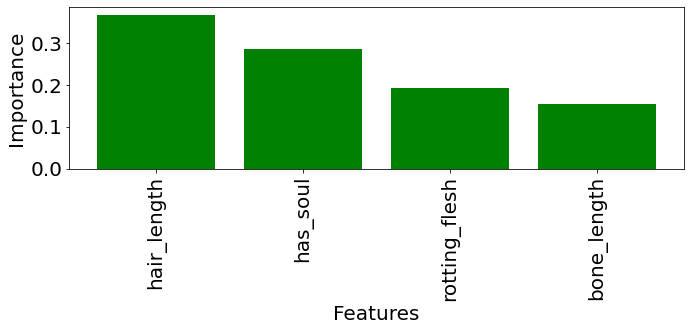

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/boo/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test['id'].to_numpy().reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/boo/submission/submission.csv', index=False)                                                                                                                                                                  

# Interpretation

## Creating the directory for the figures